# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Fall 2019**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, Chris Tanner

<hr style="height:2pt">


In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

### INSTRUCTIONS

- To submit your assignment follow the instructions given in Canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 
- As much as possible, try and stick to the hints and functions we import at the top of the homework, as those are the ideas and tools the class supports and is aiming to teach. And if a problem specifies a particular library you're required to use that library, and possibly others from the import list.
- Please use .head() when viewing data. Do not submit a notebook that is excessively long because output was not suppressed or otherwise limited. 

<hr style="height:2pt">

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

# <div class="theme"> Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York City at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `nyc_taxi.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

## <div class="exercise"> <b> Question 1  [25 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `nyc_taxi.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set data frame as `train_data` and your test set data frame as `test_data`.

**1.2**. Generate a scatter plot of the training data points with clear labels on the x and y axes to demonstrate how the number of taxi pickups is dependent on the time of the day.  Always be sure to title your plot.

**1.3**. In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result. 

**1.4**. You should see a *hole* in the scatter plot when `TimeMin` is 500-550 minutes and `PickupCount` is roughly 20-30 pickups.  Briefly surmise why this is the case.


### Answers

**1.1 Use pandas to load the dataset from the csv file ...**

In [3]:
# read the file
# your code here

data = pd.read_csv('data/nyc_taxi.csv')
data.describe()

,TimeMin,PickupCount
count,1250.00000,1250.000000
mean,702.46800,33.230400
std,405.49001,19.136391
min,4.00000,1.000000
25%,361.50000,17.000000
50%,688.50000,33.000000
75%,1046.75000,46.000000
max,1438.00000,116.000000


In [4]:
# split the data
# your code here
# Random_state makes sure same split each time this random process is run (takes out randomness)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

train_data.head()

,TimeMin,PickupCount
1194,404.0,5.0
911,131.0,17.0
422,85.0,13.0
670,539.0,36.0
931,1266.0,46.0


In [5]:
# your code here
train_data.describe()

,TimeMin,PickupCount
count,1000.000000,1000.00000
mean,703.033000,33.15600
std,405.105068,19.17575
min,4.000000,1.00000
25%,366.000000,17.00000
50%,682.500000,32.00000
75%,1046.250000,46.00000
max,1438.000000,116.00000


In [6]:
# Test size is indeed 20% of total
# your code here 
print(test_data.shape)
test_data.describe()


(250, 2)


,TimeMin,PickupCount
count,250.000000,250.000000
mean,700.208000,33.528000
std,407.833246,19.013449
min,7.000000,1.000000
25%,340.000000,17.250000
50%,721.000000,34.000000
75%,1047.000000,44.000000
max,1438.000000,101.000000


**1.2 Generate a scatter plot of the training data points**

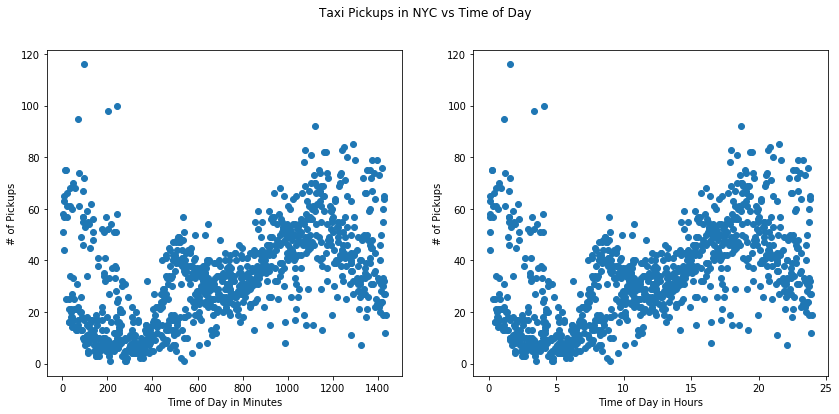

In [7]:
# Your code here
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,6))
axes[0].scatter(train_data['TimeMin'], train_data['PickupCount'])
axes[0].set_xlabel('Time of Day in Minutes')
axes[0].set_ylabel('# of Pickups')

# Hours might be a more readable format of displaying the x-axis; apply a scale transformation
axes[1].scatter(train_data['TimeMin']/60, train_data['PickupCount']);
axes[1].set_xlabel('Time of Day in Hours');
axes[1].set_ylabel('# of Pickups');

fig.suptitle("Taxi Pickups in NYC vs Time of Day");



**1.3 In a few sentences, describe the general pattern of taxi pickups over the course of the day and explain why this is a reasonable result.**

*your answer here*

The pattern of pickups seems to bear out the social patterns you'd expect in a major urban metropolis like New York.  We see instances of very high pickup counts between midnight and 5 a.m. when people take cabs home as bars close (in a city that never sleeps as opposed to a quiet academic town like Boston).  Then you see a linear trend of pickups starting at a low point in the early morning (just after 5 a.m.) during the beginning of the morning commute when you'd expect very little social going on and steadily increasing to the common social hours in the evening at night when you'd expect people to congregate for dinner, shows, concerts, etc. There does appear to be a mid-morning surge around 8am to 10:30am, perhaps as some people travel to work via taxi.  


**1.4 You should see a hole in the scatter plot when TimeMin is 500-550 minutes and PickupCount is roughly 20-30 pickups.**

*your answer here*

Weekends and weekdays likely have different behavior for the number of taxi pickups over the course of the day, especially during morning rush hour (8-9 am) when many folks are still in bed or at home on the weekends.   


## <div class="exercise"> <b>Question 2 [25 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` in the training set with a scatter plot of **predictions** for `PickupCount` vs  `TimeMin`.  Do the same for the test set.  You should have one figure with 7 x 2 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. Each subplot should use different color and/or markers to distinguish k-NN regression prediction values from the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$ (reporting the values in tabular form is encouraged).

**2.4**. Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ plots on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?
6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).

### Answers

**2.1 Choose `TimeMin` as your feature variable and `PickupCount` as your response variable.  Create a dictionary ...**

In [8]:
# your code here

# define k values
k_values = [1, 10, 75, 250, 500, 750, 1000]

# build a dictionary KNN models
KNNModels = {k: KNeighborsRegressor(n_neighbors=k) for k in k_values}

# fit each KNN model
for k_value in KNNModels: 
    KNNModels[k_value].fit(train_data[['TimeMin']], train_data[['PickupCount']])


**2.2 For each $k$ on the training set, overlay a scatter plot ...**

In [9]:

# your code here 

# Generate predictions
knn_predicted_pickups_train = {k: KNNModels[k].predict(train_data[['TimeMin']]) for k in KNNModels}
knn_predicted_pickups_test = {k: KNNModels[k].predict(test_data[['TimeMin']]) for k in KNNModels}


In [10]:
# your code here
# Preferred to use a function if the process is identical and repeated with varying inputs
# Try to use functions in your homeworks to make things easier for yourself and more replicable

# Function to plot predicted vs actual for a given k and dataset
def plot_knn_prediction(ax, dataset, predictions, k, dataset_name= "Training"):
    
    # scatter plot predictions
    ax.plot(dataset['TimeMin'], predictions, '*',  label='Predicted')
    
    # scatter plot actual
    ax.plot(dataset['TimeMin'], dataset['PickupCount'], '.', alpha=0.2, label='Actual')
    
    
    # Set labels
    ax.set_title("$k = {}$ on {} Set".format(str(k), dataset_name))
    ax.set_xlabel('Time of Day in Minutes')
    ax.set_ylabel('Pickup Count')
    ax.legend()

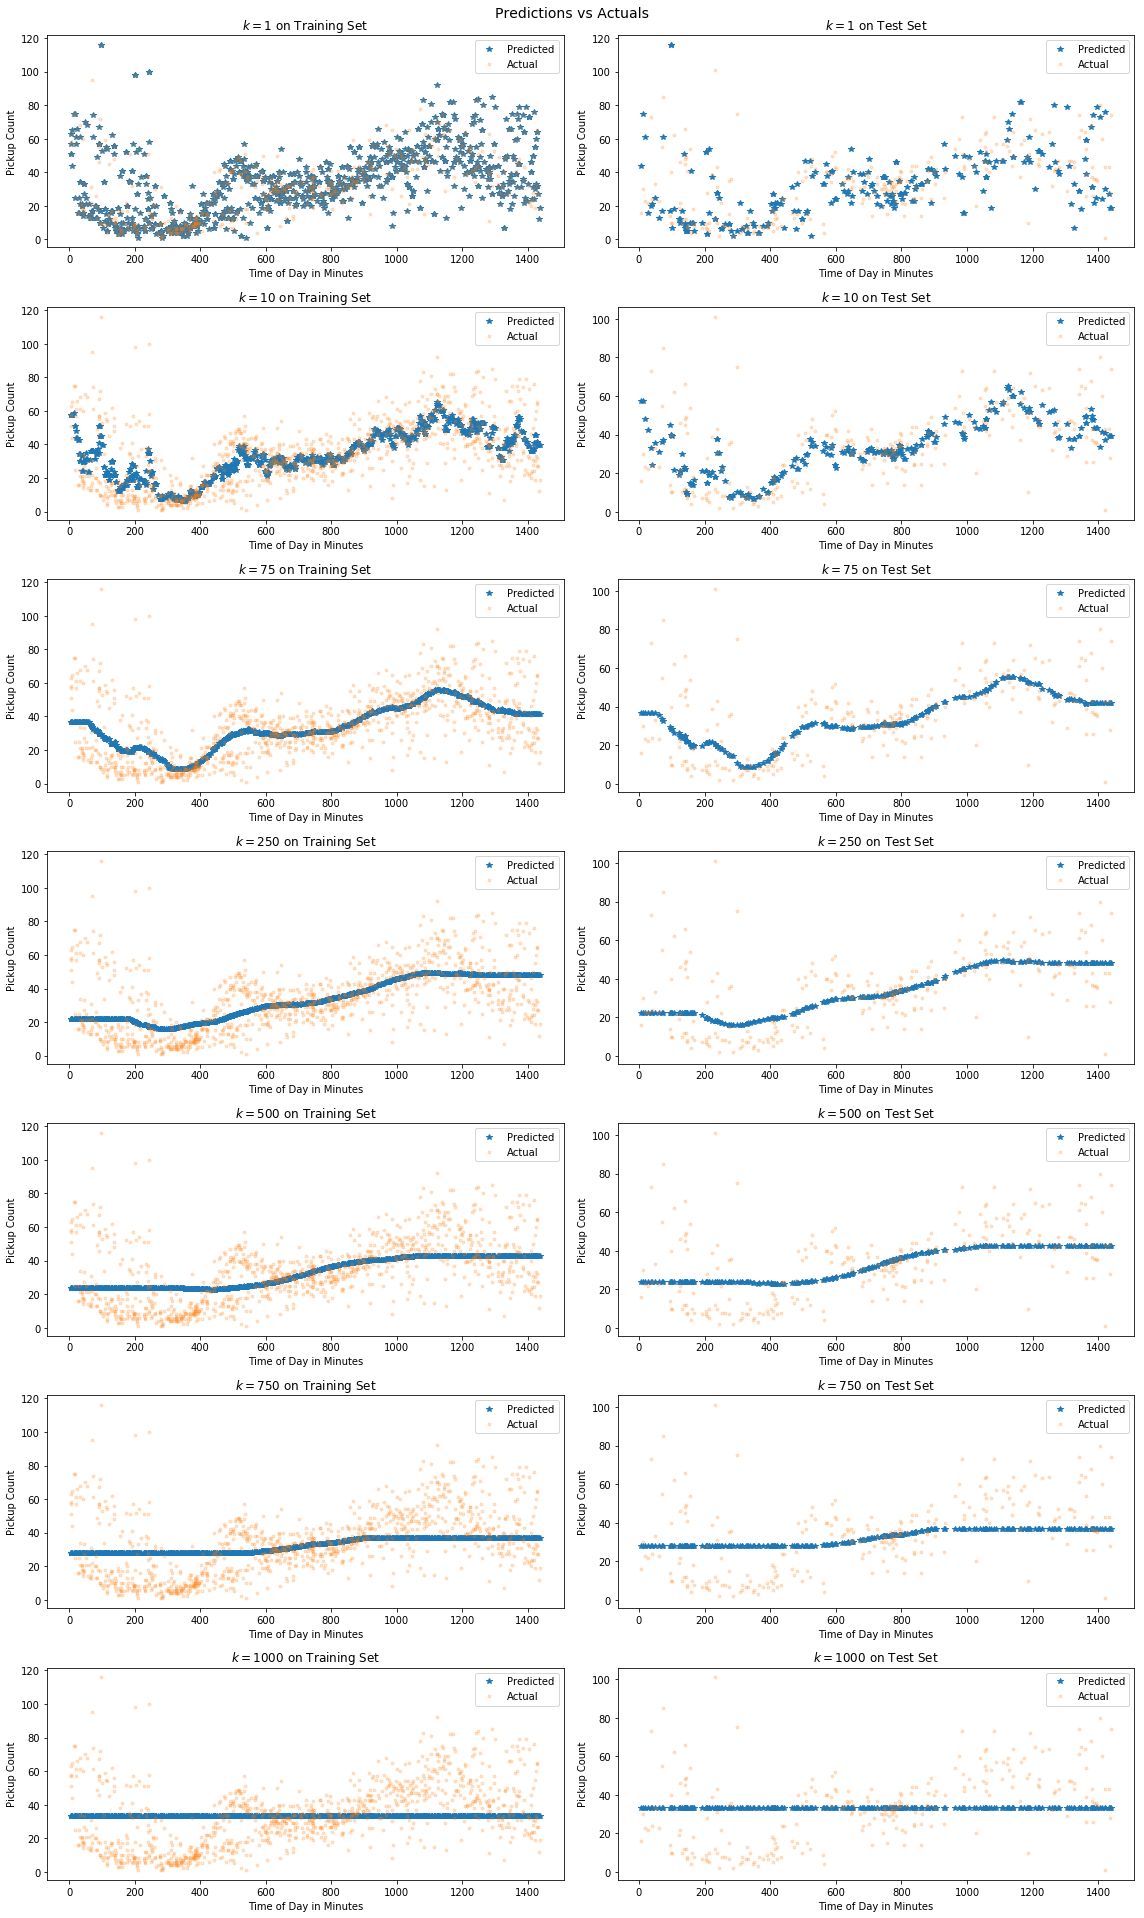

In [11]:
# Plot predictions vs actual
# your code here 

# Notice that nrows is set to the variable size. This makes the code more readable and adaptable
fig, axes = plt.subplots(nrows=len(k_values), ncols=2, figsize=(16,28))
fig.suptitle('Predictions vs Actuals', fontsize=14)
for i, k in enumerate(k_values):
    plot_knn_prediction(axes[i][0], train_data, knn_predicted_pickups_train[k], k, "Training")
    plot_knn_prediction(axes[i][1], test_data, knn_predicted_pickups_test[k], k, "Test")

fig.tight_layout(rect=[0,0.03,1,0.98])

**2.3 Report the $R^2$ score for the fitted models ...**

In [12]:
# your code here

knn_r2_train = {k : r2_score(train_data[['PickupCount']], knn_predicted_pickups_train[k]) for k in k_values}
knn_r2_test = { k : r2_score(test_data[['PickupCount']], knn_predicted_pickups_test[k]) for k in k_values}

# This format makes the display much more readable
knn_r2_df = pd.DataFrame(data = {"k" : tuple(knn_r2_train.keys()), 
                                    "Train R^2" : tuple(knn_r2_train.values()), 
                                    "Test R^2" : tuple(knn_r2_test.values())})


knn_r2_df

,k,Train R^2,Test R^2
0,1,0.712336,-0.418932
1,10,0.509825,0.272068
2,75,0.445392,0.390310
3,250,0.355314,0.340341
4,500,0.290327,0.270321
5,750,0.179434,0.164909
6,1000,0.000000,-0.000384


**2.4 Plot, in a single figure, the $R^2$ values from the model on the training and test set as a function of $k$**

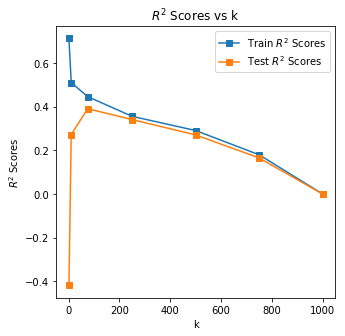

In [13]:
# your code here

fig, axes = plt.subplots(figsize = (5,5))
axes.plot(knn_r2_df['k'], knn_r2_df['Train R^2'], 's-', label='Train $R^2$ Scores')
axes.plot(knn_r2_df['k'], knn_r2_df['Test R^2'], 's-', label='Test $R^2$ Scores')
axes.set_xlabel('k')
axes.set_ylabel('$R^2$ Scores')
# A generic title of this format (y vs x) is generally appropriate
axes.set_title("$R^2$ Scores vs k")
# Including a legend is very important
axes.legend();

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
  
    A k-NN regression model that used $k = n$ is the equivalent of using the mean of the response variable values for all the points of the dataset as a prediction model.


2. What does an $R^2$ score of $0$ mean? 

    An $R^2$ value of 0 indicates a model making predictions equivalently well to a model using a constant prediction of the data's mean (and as such explains none of the variation around the mean). In k-NN Regression, an example would be the model with $k = n$ or in this case $k = 1000$.
    
    
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?

    None of the calculated $R^2$ values in this case on the training set are negative.  We see negative $R^2$ values for $k = 1$ and $k = 1000$ on the test set (although the test set $R^2$ value for $k = 1000$ is very close to 0).  A negative $R^2$ value indicate a model making predictions less accurate than using a constant prediction (for any configuration of features) of the mean of all response variable values.  Our observations of a highly negative $R^2$ score for $k = 1$ on the test set means that predictive value of the 1-NN model is very poor and 1-NN would be a worse model for our data than just taking the average value (of the test set).  For $k = 1000$ the difference between the observed $R^2$ score on the test set and 0 is due to stochasticity and 1000-NN has a predictive power essentially equivalent to taking the average value on the training set as a prediction (in this particular case it so happens that 1000-NN is exactly the same model as using the average value of the training set for a prediction). 
    

4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  

    The training and test plots of $R^2$ exhibit different trends, as for small $k$, the model overfits the data, so it achieves a very good $R^2$ on the training set and a very poor $R^2$ on the test data. At large $k$ values the model underfits. Although it performs equally well on the train and test data, it's not doing as well on either one as it did at a different value of $k$.
    
  
5. What is the best value of $k$?  How did you come to choose this value?  How do the corresponding training/test set $R^2$ values compare?

    Based on test set $R^2$ scores, the best value of $k$ is 75 with a training set $R^2$ score of 0.445 and a test set score of 0.390. Note that *best* refers to performance on the test set, the set on which the model can be evaluated.
  
  
6. Use the plots of the predictions (in 2.2) to justify why your choice of the best $k$ makes sense (**Hint**: think Goldilocks).

    A $k$ of 75 appears to be the most reasonable choice from these plots since the curve of fitted values describes the relationship in the scatter plots (both train and test) very well, but is not too jagged or jumpy (if $k$ is smaller) or too flattened out (if $k$ is larger).  We are in the Goldilocks zone.

## <div class="exercise"> <b> Question 3 [25 pts] </b></div>

We next consider simple linear regression, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create an `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Create a plot just like you did in 2.2 (but with fewer subplots): plot both the observed values and the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.

**3.4**. Report the estimates for the slope and intercept for the fitted linear model.  

**3.5**. Report the $95\%$ confidence intervals (CIs) for the slope and intercept.  

**3.6**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 
4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  
5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?


### Answers

**3.1 Again choose `TimeMin` as your predictor and `PickupCount` as your response variable.  Create a `OLS` class instance ...**

In [14]:
# your code here

# Look at these variables on their own - they format for both constant term and linear predictor
train_data_augmented = sm.add_constant(train_data['TimeMin'])
test_data_augmented = sm.add_constant(test_data['TimeMin'])
OLSModel = OLS(train_data['PickupCount'].values, train_data_augmented).fit()
# type(train_data['TimeMin'])

**3.2 Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set ...**

In [15]:
# your code here
# OLS Linear Regression model training predictions
ols_predicted_pickups_train = OLSModel.predict(train_data_augmented)

# OLS Linear Regression model test predictions
ols_predicted_pickups_test = OLSModel.predict(test_data_augmented)

In [16]:
# your code here
# Function to plot predicted vs actual for a given k and dataset
def plot_ols_prediction(ax, dataset, predictions, dataset_name= "Training"):
    
    # scatter plot predictions
    ax.plot(dataset['TimeMin'], predictions, '*',  label='Predicted')
    
    # scatter plot actual
    ax.plot(dataset['TimeMin'], dataset['PickupCount'], '.', alpha=0.2, label='Actual')
    
    
    # Set labels
    ax.set_title("{} Set".format(dataset_name))
    ax.set_xlabel('Time of Day in Minutes')
    ax.set_ylabel('Pickup Count')
    ax.legend()

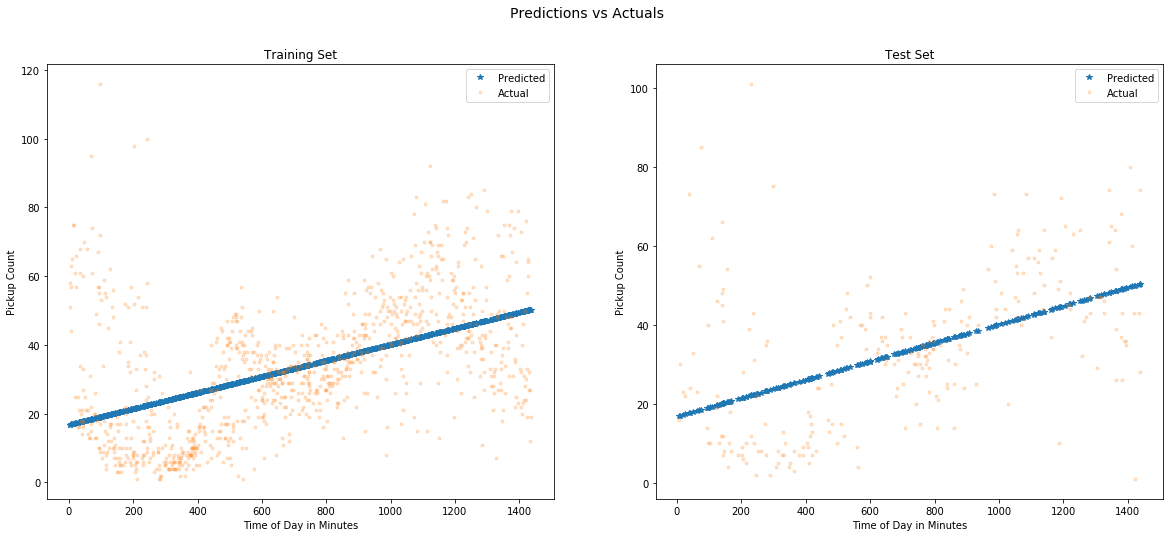

In [17]:
# your code here 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
fig.suptitle('Predictions vs Actuals', fontsize=14)
plot_ols_prediction(axes[0], train_data, ols_predicted_pickups_train, "Training")
plot_ols_prediction(axes[1], test_data, ols_predicted_pickups_test, "Test")
    


**3.3 Report the $R^2$ score for the fitted model on both the training and test sets.**

In [18]:
# your code here

r2_score_train = r2_score(train_data[['PickupCount']].values, ols_predicted_pickups_train) 
r2_score_test = r2_score(test_data[['PickupCount']].values, ols_predicted_pickups_test)

print("R^2 score for training set: {:.4}".format(r2_score_train))
print("R^2 score for test set: {:.4}".format(r2_score_test))


R^2 score for training set: 0.243
R^2 score for test set: 0.2407


**3.4 Report the slope and intercept values for the fitted linear model.**

In [19]:
## show summary
# your code here
OLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     320.4
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           2.34e-62
Time:                        14:44:16   Log-Likelihood:                -4232.9
No. Observations:                1000   AIC:                             8470.
Df Residuals:                     998   BIC:                             8480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         16.7506      1.058     15.838      0.000      14.675      18.826
TimeMin        0.0233      0.001     17.900      0.000       0.021       0.026
==============================================================================
Omnibus:                      203.688   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              462.910
Skew:                           1.111   Prob(JB):                    3.02e-101
Kurtosis:                       5.485   Cond. No.                     1.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
# your code here
ols_intercept = OLSModel.params[0]
ols_slope = OLSModel.params[1]


print("Intecept:  {:.3}".format(ols_intercept))
print("Slope: {:.3}".format(ols_slope))

Intecept:  16.8
Slope: 0.0233


**3.5 Report the $95\%$ confidence interval for the slope and intercept.**

In [21]:
# your code here
conf_int = OLSModel.conf_int()

# Doing it by hand would be something like 16.7506 +/- (1.96 * 1.058), and same process for slope

print("95% confidence interval for intercept: [{:.4}, {:.4}]".format(conf_int[0][0],conf_int[1][0]))
print("95% confidence interval for slope: [{:.4}, {:.4}]".format(conf_int[0][1],conf_int[1][1]))



95% confidence interval for intercept: [14.68, 18.83]
95% confidence interval for slope: [0.02078, 0.02589]


**3.6 Discuss the results:**

*your answer here*

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?  Describe why this is not surprising for these data.

  The test $R^2$ is lower for Linear Regression than for k-NN regression for all but the most suboptimal values of $k$ ($k \approx 0$ or $k \approx n$).  This isn't surprising since there are various indicators that a linear regression model isn't an ideal model for this particular choice of data and feature space.  This is not surprising because the scatterplot of data show a curve and not just a straight line.

  
2. What does the sign of the slope of the fitted linear model convey about the data?
  
  The positive slope implies that the number of pickups increases throughout the day, on average. The slope is positive for all values within the confidence interval.
  
  
3. Interpret the $95\%$ confidence intervals from 3.5.  Based on these CIs is there evidence to suggest that the number of taxi pickups has a significant linear relationship with time of day?  How do you know? 
  
  As mentioned in the previous part, the confidence interval only contains positive values, and this suggests that 'no association' (a slope of zero) is not plausible.  Also, the estimates for slope and intercept are reasonably precise. The intercept is estimated to fall between around 14 to 18 on data that ranges from 0-100, which reasonably small though certainly far from perfect. The slope, it seems, is very precise, estimated to be between .020 and .025. In practical terms, using the lower end would predict 29 pickups (plus the intercept) at 11:59pm and using the upper bounds would predict 36 pickups (plus the intercept) at 11:59 pm, which is a fairly tight range. Our uncertainty in the value of the slope is small enough to only moderately impact our overall uncertainty, even at the extremes of the data.
  
  
4. How would $99\%$ confidence intervals for the slope and intercept compare to the $95\%$ confidence intervals (in terms of midpoint and width)?  Briefly explain your answer.  

  We'd expect a 99% confidence interval to be wider as it should allow for an even wider possibility of values that are believable, or consistent with the data. With increased confidence level, even more values become plausible so the interval is lengthened on both sides. The 99\% CI would be centered at the same place as the 95\% CI.<br>
  
  
5. Based on the data structure, what restriction on the model would you put at the endpoints (at $x\approx0$ and $x\approx1440$)?   What does this say about the appropriateness of a linear model?
  
    Looking at $x=0$ and $x=1440$, $y$ values should be the same because it’s only a minute difference in time. That’s not the case for the predicted $\hat{y}$ though. Since the line should be 'anchored' at the same place on the ends of the graph, only a line with zero slope is consistent with this situation.

  

# <div class="theme"> Outliers </div>

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.  **Note, this is an open-ended question, there is not one correct solution (or one correct definition of an outlier).**


## <div class="exercise"><b> Question 4 [25 pts] </b></div>




**4.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**4.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**4.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?

**4.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y`, and `num_outliers` representing your features, response variable values (make sure your response variable is stored as a numpy column vector), and the number of outliers to remove.  The return value should be a list `outlier_indices` representing the indices of the `num_outliers` outliers in the original datasets you passed in.  Run your algorithm and remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.


**4.5** Create a figure with two subplots. The first is a scatterplot where the color of the points denotes the outliers from the non-outliers in the training set, and include two regression lines on this scatterplot: one fitted with the outliers included and one fitted with the outlier removed (all on the training set).  The second plot should include a scatterplot of points from the test set with the same two regression lines fitted on the training set: with and without outliers.  Visually which model fits the test set data more closely?

**4.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**4.7**. One potential problem with the brute force outlier detection approach in 4.3 and the heuristic algorithm you constructed 4.4 is that they assume prior knowledge of the number of outliers.  In general you can't expect to know ahead of time the number of outliers in your dataset.  Propose how you would alter and/or use the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  

**Hints**:
   1. Should outliers be removed one at a time or in batches?
   2. What metric would you use and how would you use it to determine how many outliers to consider removing?

### Answers
**4.1  We've provided you with two files `outliers_train.txt` and `outliers_test.txt` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?** 

In [22]:
# read the data
# your code here
outliers_train = pd.read_csv("data/outliers_train.csv")
outliers_test = pd.read_csv("data/outliers_test.csv")

outliers_train.describe()

,X,Y
count,53.000000,53.000000
mean,-0.060179,-12.356066
std,1.022698,166.899480
min,-2.110000,-334.859357
25%,-0.813775,-134.582390
50%,0.011852,14.303940
75%,0.630360,105.731108
max,1.931000,320.000000


In [23]:
# your code here
outliers_train.head()

,X,Y
0,-0.773019,-219.103753
1,-0.394034,-334.859357
2,0.630360,-16.232549
3,-0.350418,-179.034618
4,-1.491328,-109.710316


In [24]:
# your code here
outliers_test.describe()

,X,Y
count,50.000000,50.000000
mean,-0.108523,-17.277379
std,0.969121,138.439208
min,-2.368623,-391.123602
25%,-0.619012,-100.876386
50%,-0.171438,-17.835148
75%,0.447461,72.207069
max,1.850152,294.925241


In [25]:
# your code here
outliers_test.head()

,X,Y
0,-0.573524,-91.080764
1,-0.793911,-19.982576
2,0.788391,118.593685
3,0.489036,64.973804
4,1.530648,178.281580


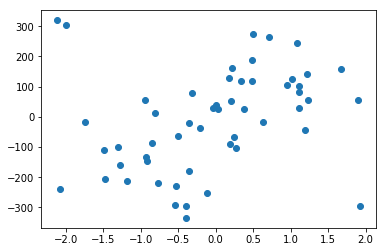

In [26]:
# scatter plot
# your code here
plt.scatter(outliers_train["X"],outliers_train["Y"]);

*your answer here*
  
The dataset seems to have a roughly linear trend with 3 really clear outliers: 2 in the upper-left and one in the lower-right of the scatterplot (they do not follow the pattern of the rest of the points). 


**4.2 Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create ...**

In [27]:
# your code here
# Reshape with -1 makes numpy figure out the correct number of rows
outliers_orig_train_X = outliers_train["X"].values.reshape(-1,1)
outliers_orig_train_Y = outliers_train["Y"].values.reshape(-1,1)

outliers_train_X = sm.add_constant(outliers_orig_train_X)
outliers_train_Y = outliers_orig_train_Y

outliers_orig_test_X = outliers_test["X"].values.reshape(-1,1)
outliers_orig_test_Y = outliers_test["Y"].values.reshape(-1,1)

outliers_test_X = sm.add_constant(outliers_orig_test_X)
outliers_test_Y = outliers_orig_test_Y

OutlierOLSModel = sm.OLS(outliers_train_Y, outliers_train_X).fit() 

OutlierOLSModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     4.689
Date:                Sun, 29 Sep 2019   Prob (F-statistic):             0.0351
Time:                        14:44:16   Log-Likelihood:                -343.59
No. Observations:                  53   AIC:                             691.2
Df Residuals:                      51   BIC:                             695.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.5063     22.192     -0.428      0.670     -54.059      35.046
x1            47.3554     21.869      2.165      0.035       3.452      91.259
==============================================================================
Omnibus:                        2.102   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.350   Jarque-Bera (JB):                1.251
Skew:                           0.215   Prob(JB):                        0.535
Kurtosis:                       3.617   Cond. No.                         1.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**4.3 One potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?**
  
  

*your answer here*

There are 53 total observations in the training set.  That means there are $\binom{53}{3}$ or 23,426 subsets in the training set with 3 points removed.  We'll need to compute a Linear Regression model on each one and find the best one (presumably the one with the highest $R^2$ value on test).

**4.4 Construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals ...**

In [28]:
def find_outliers_simple(dataset_x, dataset_y, num_outliers):
    # your code here
    
    # calculate absolute value residuals
    y_pred = sm.OLS(dataset_y, dataset_x).fit().predict().reshape(-1,1)
    residuals = np.abs(dataset_y - y_pred)

    # use argsort to order the indices by absolute value of residuals
    # get all but the 3 highest residuals
    outlier_indices = np.argsort(residuals, axis=0).flatten()[-num_outliers:]
    
    return list(outlier_indices)

In [29]:
# get outliers
# your code here
simple_outlier_indices = find_outliers_simple(outliers_train_X, outliers_orig_train_Y, 3)

print("Outlier indices: {} ".format(simple_outlier_indices))

# get outliers
simple_outliers_x = outliers_orig_train_X[simple_outlier_indices]
simple_outliers_y= outliers_orig_train_Y[simple_outlier_indices]


# new_dataset_indices are the complements of our outlier indices in the original set
new_dataset_indices = list(set(range(len(outliers_orig_train_X))) - set(simple_outlier_indices))
new_dataset_indices.sort()

# get outliers free dataset
simple_outliers_free_x = outliers_train_X[new_dataset_indices]
simple_outliers_free_y = outliers_train_Y[new_dataset_indices]



print("Outlier X values: {} ".format(simple_outliers_x))
print("Outlier Y values: {} ".format(simple_outliers_y))

Outlier indices: [52, 51, 50] 
Outlier X values: [[ 1.931]
 [-1.991]
 [-2.11 ]] 
Outlier Y values: [[-297.]
 [ 303.]
 [ 320.]] 


In [30]:
simple_outliers_y

array([[-297.],
       [ 303.],
       [ 320.]])

In [31]:
# calculate outlier model
# your code here
OutlierFreeSimpleModel = sm.OLS(simple_outliers_free_y, simple_outliers_free_x).fit()
OutlierFreeSimpleModel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     32.50
Date:                Sun, 29 Sep 2019   Prob (F-statistic):           7.16e-07
Time:                        14:44:16   Log-Likelihood:                -309.21
No. Observations:                  50   AIC:                             622.4
Df Residuals:                      48   BIC:                             626.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.4796     16.944     -1.032      0.307     -51.547      16.588
x1           104.8467     18.392      5.701      0.000      67.867     141.827
==============================================================================
Omnibus:                        0.600   Durbin-Watson:                   1.683
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.673
Skew:                          -0.238   Prob(JB):                        0.714
Kurtosis:                       2.689   Cond. No.                         1.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**4.5 Create a figure with two subplots...**

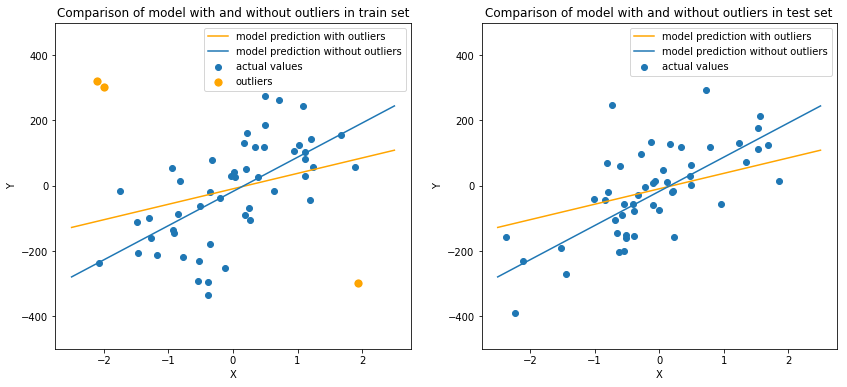

In [32]:
# plot 
# your code here

fig, axs = plt.subplots(1,2, figsize=(14,6))

ticks = np.linspace(-2.5,2.5, 100)
regression_line_no = ticks*OutlierOLSModel.params[1] + OutlierOLSModel.params[0]
regression_line = ticks*OutlierFreeSimpleModel.params[1] + OutlierFreeSimpleModel.params[0]
axs[0].scatter(outliers_train["X"],outliers_train["Y"], label="actual values")
axs[0].scatter(simple_outliers_x, simple_outliers_y, color='orange', marker='o',  s=52, label="outliers")
axs[0].plot(ticks, regression_line_no, color='orange', label="model prediction with outliers")
axs[0].plot(ticks, regression_line, label="model prediction without outliers")
axs[0].set_title('Comparison of model with and without outliers in train set')
axs[0].set_xlabel("X")
axs[0].set_ylabel("Y")
axs[0].set_ylim((-500,500))
axs[0].legend()

axs[1].scatter(outliers_test["X"],outliers_test["Y"], label="actual values")

axs[1].plot(ticks, regression_line_no, color='orange', label="model prediction with outliers")
axs[1].plot(ticks, regression_line, label="model prediction without outliers")
axs[1].set_title('Comparison of model with and without outliers in test set')
axs[1].set_xlabel("X")
axs[1].set_ylabel("Y")
axs[1].set_ylim((-500,500))
axs[1].legend();



*your answer here*

The model with outliers removed fits the test data more closely: the orange line looks to have some systematic bias in predictions at very low or very high values of X.

**4.6  Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?**

In [33]:
# your code here

r2_with_outliers = r2_score(outliers_test_Y, OutlierOLSModel.predict(sm.add_constant(outliers_test_X)))
r2_wo_outliers = r2_score(outliers_test_Y, OutlierFreeSimpleModel.predict(sm.add_constant(outliers_test_X)))

print("R^2 score with outliers: {:.4}".format(r2_with_outliers))
print("R^2 score with outliers removed: {:.4}".format(r2_wo_outliers))

R^2 score with outliers: 0.3409
R^2 score with outliers removed: 0.453


The version with outliers removed is better. 

**4.7 Propose how you would alter and/or use the algorithm you constructed in 4.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.**

Find outliers one at a time. Find the worst outlier which improves the $R^2$ the most by removing it (on the test set), and keep removing outliers until the improvement to test $R^2$ is neglibigle less than some tolerance threshold. If you used the train set to compare $R^2$, you could easily remove the outlier and see a huge drop in $R^2$ just because it was the main driving force in MSM (the variance explained by the model) or MST (the original variance ignoring the model). Also, it would be good to specify some minimum number of points to be remaining (no more than half the observations should be considered outliers).